### Car Price Prediction with Machine Learning

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

Data loading and exploration

In [4]:
# Load the dataset
car_data = pd.read_csv('car_data.csv')

# Display the first few rows of the dataset to understand its structure
car_data.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Data cleaning

In [6]:
# Checking for missing values
missing_values = car_data.isnull().sum()
missing_values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

There is no missing data in the dataset

### Feature Engineering

In [7]:

# Creating a new feature 'Car_Age' to represent the age of the car
current_year = 2023
car_data['Car_Age'] = current_year - car_data['Year']

# Dropping the original 'Year' column as it's no longer needed
car_data = car_data.drop('Year', axis=1)

# Displaying the missing values and the first few rows of the updated dataset
car_data.head()


,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


### Exploratory Data Analysis (EDA) and Visualization.

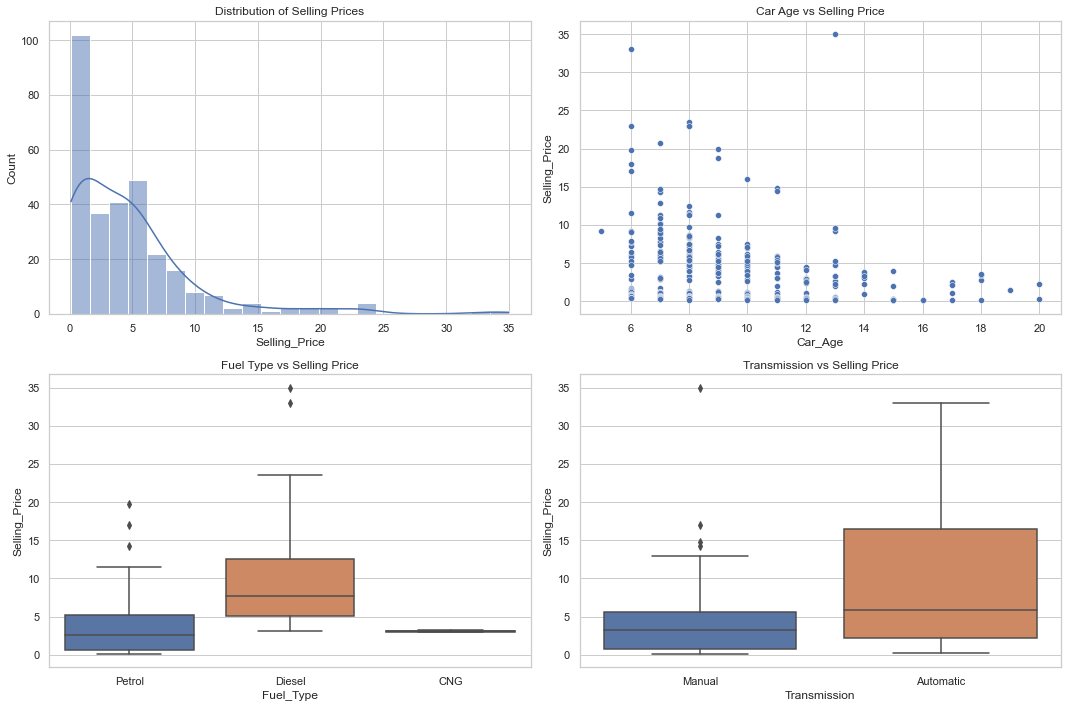

In [9]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Distribution of Selling Prices
sns.histplot(car_data['Selling_Price'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Selling Prices')

# Relationship between Car Age and Selling Price
sns.scatterplot(x='Car_Age', y='Selling_Price', data=car_data, ax=axes[0, 1])
axes[0, 1].set_title('Car Age vs Selling Price')

# Impact of Fuel Type on Selling Price
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data, ax=axes[1, 0])
axes[1, 0].set_title('Fuel Type vs Selling Price')

# Impact of Transmission on Selling Price
sns.boxplot(x='Transmission', y='Selling_Price', data=car_data, ax=axes[1, 1])
axes[1, 1].set_title('Transmission vs Selling Price')

plt.tight_layout()
plt.show()


<p>Distribution of Selling Prices: This plot shows the frequency distribution of the selling prices of the cars. It helps to understand the range and common selling prices in the dataset.</p>
<p>Car Age vs Selling Price: This scatter plot illustrates the relationship between the age of a car and its selling price. It helps to analyze how the value of a car depreciates over time.</p>
<p>Fuel Type vs Selling Price: This box plot shows the variation in selling prices based on the fuel type of the car. It highlights the differences in prices among different fuel types.</p>
<p>Transmission vs Selling Price: This box plot compares the selling prices of cars with different types of transmissions. It helps to understand how transmission type affects the selling price.</p>

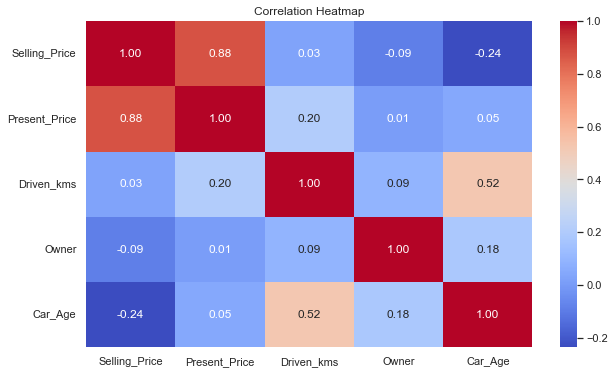

In [10]:
# Creating a correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(car_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


###  Train a machine learning model

In [12]:
# Separating the target variable and features
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)  # Dropping 'Car_Name' as it's not useful for prediction
y = car_data['Selling_Price']

In [13]:
# Identifying categorical columns for encoding
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

In [14]:
# Creating a pipeline
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
pipeline = Pipeline([('transformer', transformer), ('regressor', regressor)])

In [15]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
pipeline.fit(X_train, y_train)

# Predicting and evaluating
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.9528350681967213, 0.9586363841838941)

<p>Mean Squared Error (MSE): 0.95. This metric measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. A lower MSE indicates better performance.</p>
<p>R-squared (R²): 0.96. This metric provides a measure of how well future samples are likely to be predicted by the model. R² score near 1 indicates that the model explains a large portion of the variance in the response variable.</p>
<p>An R² score of 0.96 suggests that the model does a good job in predicting the selling price of cars, considering the features provided.</p>

In [16]:



# Feature importance analysis
feature_importances = pipeline.named_steps['regressor'].feature_importances_

# Getting feature names after transformation
feature_names = list(pipeline.named_steps['transformer'].named_transformers_['one_hot'].get_feature_names(input_features=categorical_features))
feature_names += [col for col in X.columns if col not in categorical_features]

# Creating a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

feature_importances_df


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Feature,Importance
7,Present_Price,0.879127
10,Car_Age,0.054094
8,Driven_kms,0.037783
6,Transmission_Manual,0.012165
5,Transmission_Automatic,0.005607
2,Fuel_Type_Petrol,0.004562
1,Fuel_Type_Diesel,0.002305
4,Selling_type_Individual,0.001883
3,Selling_type_Dealer,0.001698
9,Owner,0.000764


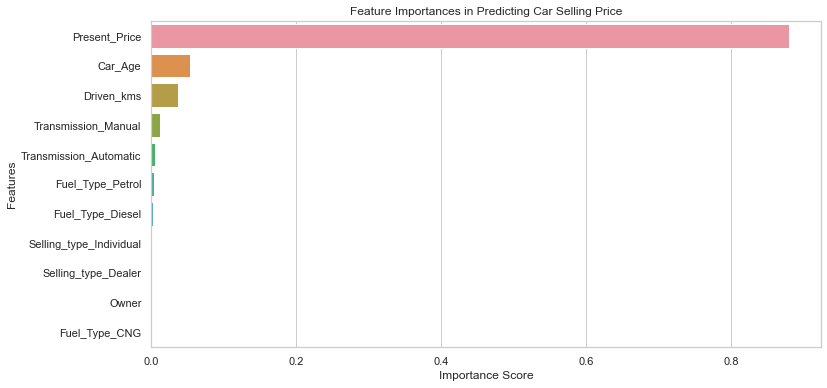

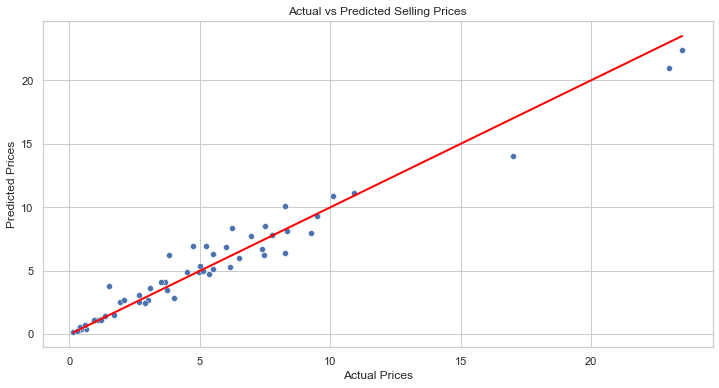

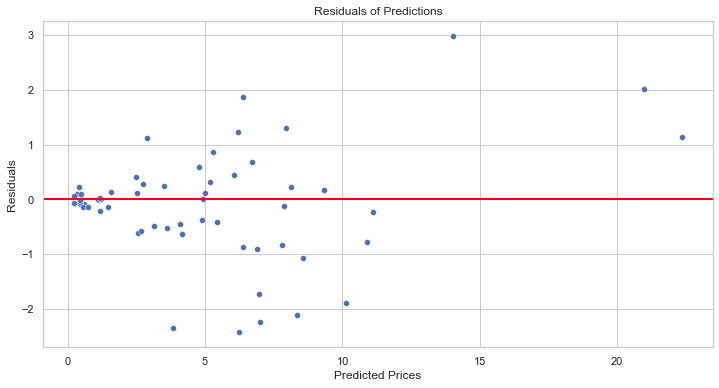

In [17]:

# Feature Importance Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances in Predicting Car Selling Price')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Predictions for visualization
y_pred = pipeline.predict(X_test)

# Actual vs Predicted Prices Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Selling Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.axhline(y=0, color='red', lw=2)
plt.show()


<p>Present_Price: This is the most important feature, with the highest importance score. It indicates that the current market price of the car is a significant predictor of its selling price.</p>
<p>Year: The year of the car, which indirectly represents its age, is the second most important feature. This suggests that newer cars tend to sell for higher prices.</p>
<p>Driven_kms: The kilometers driven by the car is also an important factor, affecting its selling price.</p>
<p>Transmission Type: Both 'Transmission_Manual' and 'Transmission_Automatic' have notable importance, indicating the transmission type influences the selling price.</p>
<p>Fuel_Type: Different fuel types ('Diesel', 'Petrol', 'CNG') have varying degrees of influence on the selling price, with 'Diesel' being the most influential among them.</p>
<p>Selling_type and Owner: These features have relatively lower importance scores, suggesting a lesser impact on the selling price compared to other features.</p>
<p>Given these insights, It can be concluded that the current market price, age, and kilometers driven are crucial factors in predicting the selling price of a car. Transmission and fuel type also play significant roles, but to a lesser extent.</p>